In [2]:
# confusion metrix

from sklearn.datasets import load_digits
load_digits()['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
load_digits()['target'][0] # 0번째 숫자값

0

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier (BaseEstimator) :
    def fit(self,X,Y) :
        pass

    def predict (self, X):
        return np.zeros ((len(X), 1) , dtype=bool)
    
digits = load_digits()
print (digits. data)
print ("### digits. data. shape:" , digits.data.shape)
print (digits. target)
print("### digits. target shape:", digits.target.shape)

digits.target == 7

y = (digits. target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits. data, y, random_state=11)
          
print ( ' 레이블  테스트 세트 크기 : ' , y_test.shape )
print ( ' 테스트 세트 레이블 0과 1의 분포도 ' )
print (pd. Series(y_test). value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit (X_train , y_train)
fakepred = fakeclf.predict (X_test)
print (f'모든 예측을 0으로 하여도 정확도는 : {accuracy_score(y_test, fakepred):.3f}')


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits. data. shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits. target shape: (1797,)
 레이블  테스트 세트 크기 :  (450,)
 테스트 세트 레이블 0과 1의 분포도 
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_35389/2497620010.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, fakepred)
tn, fp, fn, tp = result.ravel() # 1차원 배열로 변경, 하나씩 할당
tn, fp, fn, tp # t:true n:negative(0) f:false p:positive(1)

(405, 0, 45, 0)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#accuracy_score(y_test, fakepred)
#precision_score(y_test, fakepred) # 정밀도 # 0으로 나눠지지 않는 오류
recall_score(y_test, fakepred) # 재현율


0.0

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

titanic_train_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_test_df = pd.read_csv('./datasets/titanic_test.csv')
titanic_train_df.head()

# 결측치 처리
mean = titanic_train_df['Age'].mean()
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(mean)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(mean)

# 성별 숫자로 변경
le = LabelEncoder()
le.fit(titanic_train_df['Sex'])

titanic_train_df['Sex'] = le.transform(titanic_train_df['Sex'])
titanic_test_df['Sex'] = le.transform(titanic_test_df['Sex'])

# 데이터 뽑아오기
gender_submission = pd.read_csv('./datasets/titanic_gender_submission.csv')
X_train_df = titanic_train_df[['Pclass', 'Sex','Age']]
y_train = titanic_train_df['Survived']

X_test_df = titanic_test_df[['Pclass', 'Sex','Age']]
y_test = gender_submission['Survived'] # 실제값

lr_clf = LogisticRegression()

clf = LogisticRegression(random_state=0)
clf.fit(X_train_df, y_train)

pred = clf.predict(X_test_df) # 예측값

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, pred)
precision_score(y_test, pred)
recall_score(y_test, pred)
f1_score(y_test, pred)

0.9411764705882353

In [9]:
pred_proba = clf.predict_proba(X_test_df)
pred_proba[:, 1]

array([0.07758662, 0.40917757, 0.09613191, 0.09719739, 0.61192902,
       0.14174069, 0.54788624, 0.25804812, 0.64269377, 0.11595667,
       0.08967637, 0.36016139, 0.93714081, 0.09330995, 0.87124971,
       0.821906  , 0.20548738, 0.11595667, 0.57220891, 0.42518038,
       0.29507337, 0.16296258, 0.92283159, 0.56171633, 0.86751255,
       0.04807468, 0.93905191, 0.11099111, 0.39888698, 0.08967637,
       0.13634077, 0.27084991, 0.52333267, 0.55033799, 0.48798348,
       0.12466134, 0.55033799, 0.61971526, 0.10312852, 0.08967637,
       0.06762853, 0.49045797, 0.0635943 , 0.79114548, 0.8784547 ,
       0.10312852, 0.36778013, 0.08967637, 0.81520624, 0.4986658 ,
       0.53727952, 0.2517972 , 0.84036705, 0.92672094, 0.23543308,
       0.15852287, 0.07641708, 0.10312852, 0.08967637, 0.90670777,
       0.13014896, 0.22207604, 0.12646814, 0.61192902, 0.62514043,
       0.792777  , 0.64269377, 0.35261246, 0.47976428, 0.81520624,
       0.59618749, 0.11595667, 0.55602515, 0.50032308, 0.90945

In [10]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f}')

In [11]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[237  29]
 [  0 152]]
정확도:0.9306, 정밀도:0.8398, 재현율: 1.0000 , f1 : 0.9129
임계값 : 0.45
오차행렬
[[242  24]
 [  3 149]]
정확도:0.9354, 정밀도:0.8613, 재현율: 0.9803 , f1 : 0.9169
임계값 : 0.5
오차행렬
[[256  10]
 [  8 144]]
정확도:0.9569, 정밀도:0.9351, 재현율: 0.9474 , f1 : 0.9412
임계값 : 0.55
오차행렬
[[262   4]
 [ 13 139]]
정확도:0.9593, 정밀도:0.9720, 재현율: 0.9145 , f1 : 0.9424
임계값 : 0.6
오차행렬
[[264   2]
 [ 44 108]]
정확도:0.8900, 정밀도:0.9818, 재현율: 0.7105 , f1 : 0.8244


In [12]:
# sklearn.metrics.precision_recall_curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[: , 1])

precision , recall, thresholds

(array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
        0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
        0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
        0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44705882,
        0.45103858, 0.45238095, 0.4592145 , 0.46060606, 0.46200608,
        0.46769231, 0.47648903, 0.48717949, 0.49190939, 0.49350649,
        0.49511401, 0.50165017, 0.51877133, 0.52413793, 0.52595156,
        0.53333333, 0.53900709, 0.54092527, 0.54285714, 0.54480287,
        0.54676259, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
        0.55882353, 0.56088561, 0.56296296, 0.56716418, 0.56928839,
        0.57358491, 0.57794677, 0.58461538, 0.58687259, 0.58914729,
        0.59143969, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
        0.6031746 , 0.60557769, 0.61044177, 0.62295082, 0.63333333,
        0.63598326, 0.64135021, 0.64680851, 0.65236052, 0.65517241,
        0.66666667, 0.67555556, 0.68468468, 0.69

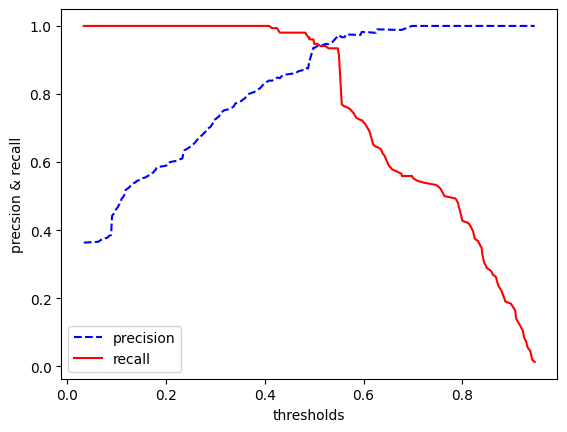

In [13]:
# matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(thresholds , precision[:-1] , 'b--' , label="precision")
plt.plot(thresholds , recall[:-1] , 'r-', label="recall")
plt.xlabel("thresholds")
plt.ylabel("precsion & recall")
plt.legend()
plt.show()

In [14]:
len(thresholds), len(recall)

(194, 195)

In [15]:
# sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve
fprs, tprs, thresholds =roc_curve(y_test, pred_proba[: , 1])

len(fprs) , len(tprs)

(127, 127)

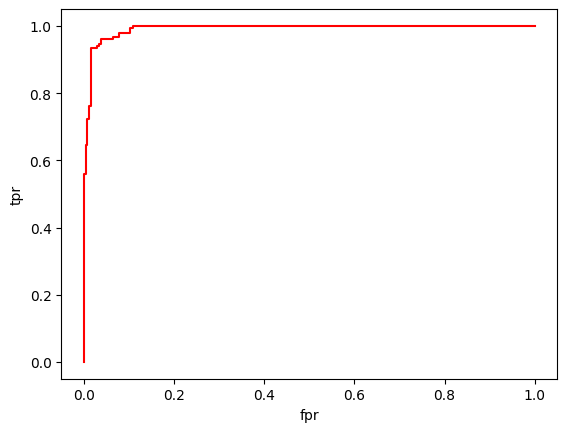

In [16]:
# matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(fprs ,tprs ,  color='red')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [17]:
# sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba[: , 1])

0.9916402849228334

## PIMA Diabets ##

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./datasets/pima_diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 한쪽기준으로 정리
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f}, AUC : {auc:.4f}')

In [21]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[84 13]
 [25 32]]
정확도:0.7532, 정밀도:0.7111, 재현율: 0.5614 , f1 : 0.6275, AUC : 0.8405


In [22]:
def precision_recall_curve_plot(y_test, pred_proba) :
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)
    print(precision)
    
    plt.plot(thresholds , precision[:-1] , 'b--' , label="precision")
    plt.plot(thresholds , recall[:-1] , 'r-', label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("precision & recall")
    plt.legend()
    plt.show()

[0.37012987 0.37254902 0.375      0.37748344 0.38       0.38255034
 0.38513514 0.3877551  0.39041096 0.39310345 0.39583333 0.3986014
 0.40140845 0.40425532 0.40714286 0.41007194 0.41304348 0.41605839
 0.41911765 0.42222222 0.42537313 0.42857143 0.42424242 0.42748092
 0.43076923 0.43410853 0.4375     0.44094488 0.44444444 0.448
 0.4516129  0.45528455 0.45901639 0.46280992 0.46666667 0.47058824
 0.47457627 0.47863248 0.48275862 0.48695652 0.49122807 0.49557522
 0.49107143 0.48648649 0.49090909 0.49541284 0.5        0.5046729
 0.50943396 0.51428571 0.51923077 0.52427184 0.52941176 0.53465347
 0.54       0.54545455 0.55102041 0.55670103 0.5625     0.56842105
 0.57446809 0.56989247 0.56521739 0.57142857 0.57777778 0.57303371
 0.57954545 0.57471264 0.58139535 0.58823529 0.5952381  0.59036145
 0.59756098 0.60493827 0.6125     0.60759494 0.61538462 0.61038961
 0.61842105 0.61333333 0.60810811 0.61643836 0.625      0.61971831
 0.61428571 0.62318841 0.63235294 0.64179104 0.65151515 0.64615385
 0

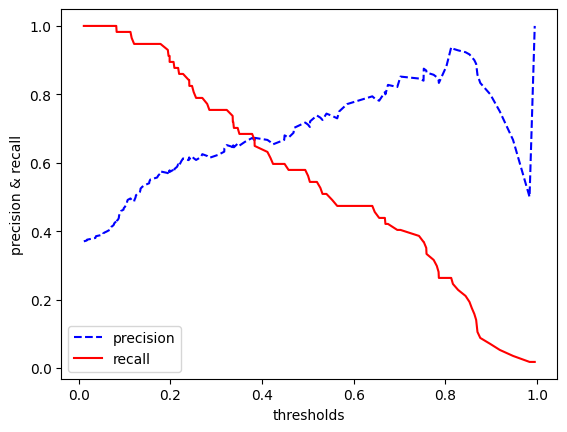

In [23]:
precision_recall_curve_plot(y_test, pred_proba)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

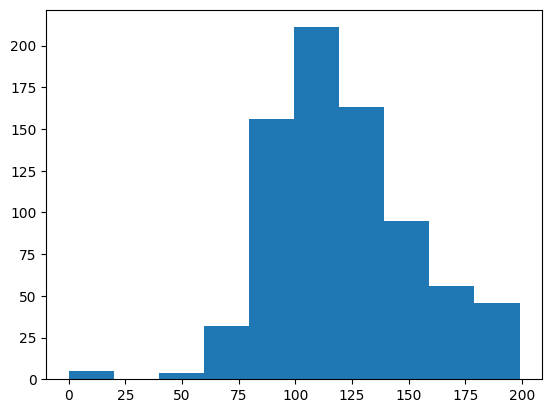

In [24]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [26]:
X_train_df = pd.DataFrame(X_train, columns=diabetes_data.columns[:-1])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_df['Glucose'])
X_train_df['']